# Edge Detection in Computer Vision

Edge detection is a basic but important task in Computer Vision. It is usually done to reduce the amount of data yet preserving the structural properties of the objects in the image. The popular tasks that use edge detection are lane detection and converting an image into a sketch. 

Although there are a lot of algorithms for edge detection, today we are going to discuss **Canny Edge Detection algorithm** (by John F. Canny in 1986).  

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

It is a multi-stage algorithm: 

### Step 1: Noise reduction using Gaussian blur :
        A Gaussian filter is convolved over the image to remove noise and to prevent the assumption of noise as edges. The sudden change of intensity of pixels should not be considered as an edge therefore it is vital to first treat the input image with smoothing.

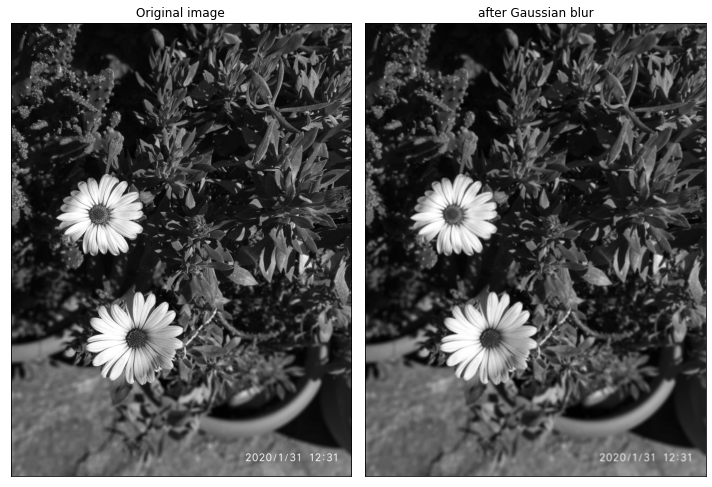

In [2]:
# example showing how to use Gaussian blur on an image

# input image
img = cv2.imread("flower.jpg", 0)

# gaussian smoothing
blurred = cv2.GaussianBlur(img, (5, 5), 1.4) 


f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(img, cmap='gray')
ax1.title.set_text("Original image")
ax2.imshow(blurred, cmap='gray')
ax2.title.set_text("after Gaussian blur")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
f.tight_layout()

### Step 2: Finding Gradients: 
    A gradient is nothing but the change in the intensity of the pixels of the image. After the image is smoothed, gradients are calculated along x and y direction using Sobel-operator. The gradient magnitudes (also known as the edge strengths) can then be determined as an Euclidean distance measure by applying the law of Pythagoras.

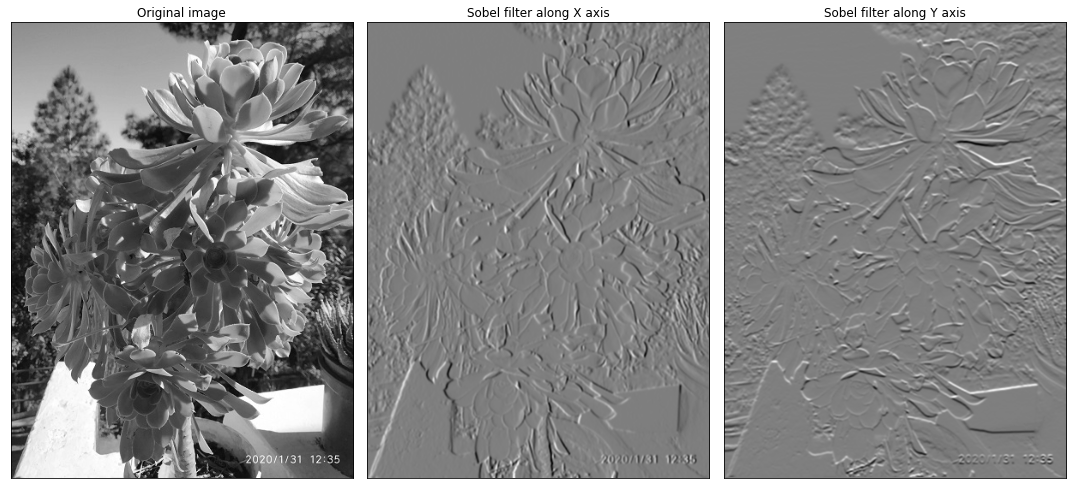

In [3]:
# example showing how to find gradients using Sobel operators

# input image
img = cv2.imread("plant2.jpg", 0)

sobelx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1,0, ksize=5)
sobely = cv2.Sobel(np.float32(img), cv2.CV_64F, 0,1, ksize=5)

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(img, cmap='gray')
ax1.title.set_text("Original image")
ax2.imshow(sobelx, cmap='gray')
ax2.title.set_text("Sobel filter along X axis")
ax3.imshow(sobely, cmap='gray')
ax3.title.set_text("Sobel filter along Y axis")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
f.tight_layout()

### Step 3: Non-max supression:
    
    Non-maximum suppression is applied to find the locations with the sharpest change of intensity value. The algorithm for each pixel in the gradient image is:

    1) Round the gradient direction θ to nearest 45 degree, corresponding to the use of an 8-connected neighbourhood.

    2) Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
    
    3) If the edge strength of the current pixel is the largest compared to the other pixels in the mask with the same direction (e.g., a pixel that is pointing in the y-direction will be compared to the pixel above and below it in the vertical axis), the value will be preserved. Otherwise, the value will be suppressed.

### Step 4: Double Thresholding
    The edge-pixels remaining after the non-maximum suppression step are (still) marked with their strength pixel-by-pixel. Many of these will probably be true edges in the image, but some may be caused by noise or color variations for instance due to rough surfaces. The simplest way to discern between these would be to use a threshold, so that only edges stronger that a certain value would be preserved. The Canny edge detection algorithm uses double thresholding. Edge pixels stronger than the high threshold are marked as strong; edge pixels weaker than the low threshold are suppressed and edge pixels between the two thresholds are marked as weak

### Step 5: Edge tracking by hysteresis
    This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded.

> **openCV has a nice implementation ` cv2.Canny() `which wraps all these steps into one function**

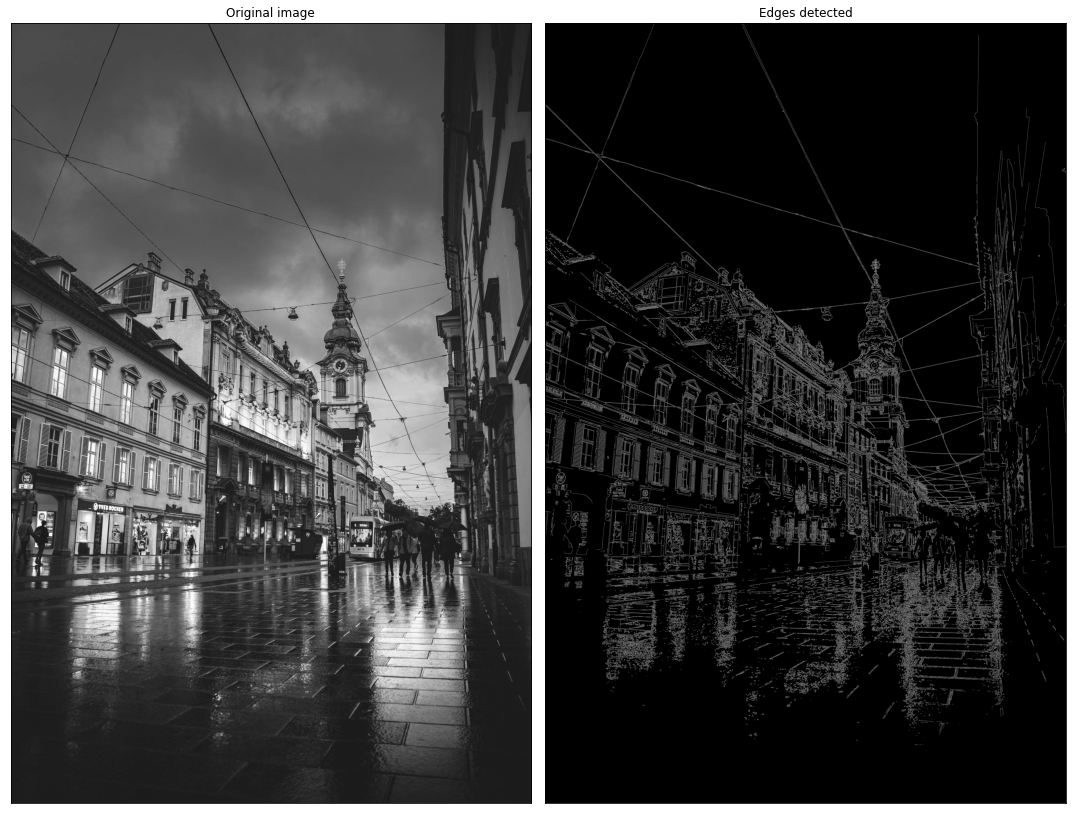

In [4]:
img = cv2.imread("city.jpg", 0)
# detect edges 
canny = cv2.Canny(img, 100,200)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text("Original image")
ax2.imshow(canny, cmap='gray')
ax2.title.set_text("Edges detected")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
f.tight_layout()

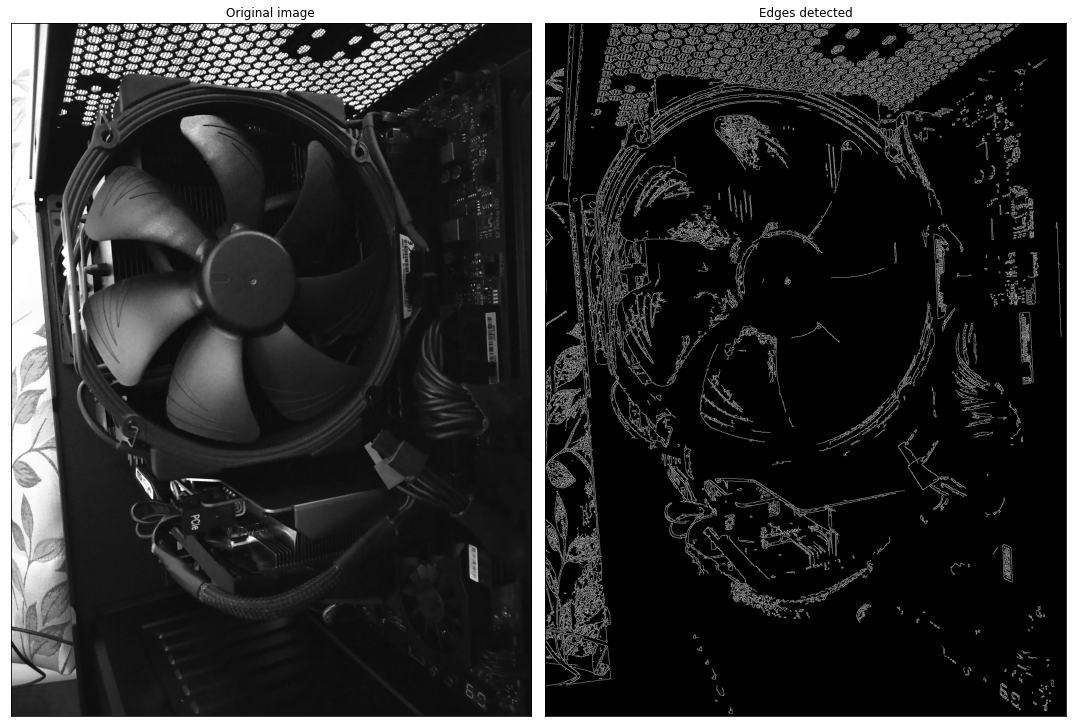

In [5]:
img = cv2.imread("noctua.jpg", 0)
# detect edges 
canny = cv2.Canny(img, 30,100)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text("Original image")
ax2.imshow(canny, cmap='gray')
ax2.title.set_text("Edges detected")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
f.tight_layout()

references:
- https://en.wikipedia.org/wiki/Canny_edge_detector
- https://www.cse.iitd.ac.in/~pkalra/col783-2017/canny.pdf
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
- https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/
- https://www.tutorialspoint.com/opencv/opencv_canny_edge_detection.htm